# Data Processing & Exploratory Data Analysis


In this notebook the data gathered from the YouTube API regarding Marques Brownlee's (MKBHD) channel is read in as a data frame and regular data processing is done. Specifically, data types were handled, missing values were handled. Additionally, exploratory analysis was done to help understand the spread & distribution of the data. Data transformation techniques were employed to normalize the positive skewed data in certain features. Moreover, feature engineering and feature selection was done. 

## Data Preprocessing

In [65]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)


In [2]:
# Import the file and convert to a dataframe

df = pd.read_csv ('data\marques_youtube_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1679 entries, 0 to 1678
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         1679 non-null   object
 1   Description   1663 non-null   object
 2   Views         1679 non-null   object
 3   Likes         1679 non-null   object
 4   Comments      1679 non-null   object
 5   Published_at  1679 non-null   object
dtypes: object(6)
memory usage: 78.8+ KB


In [4]:
# Check for null values

df.isnull().sum()

Title            0
Description     16
Views            0
Likes            0
Comments         0
Published_at     0
dtype: int64

In [5]:
df.head(5)

,Title,Description,Views,Likes,Comments,Published_at
0,iPhone 16/16 Pro Review: Times Have Changed!,iPhone 16 is here. Job finished? Job ain't fin...,4200086,135123,16517,2024-09-23T23:23:20Z
1,iPhone 16/16 Pro Unboxing: End of an Era!,iPhone 16 and 16 Pro have 1 change to the boxe...,6107093,183924,12370,2024-09-18T12:01:27Z
2,Apple Watch Series 10 Review: This is It?,"So... this is the big ""redesign,"" eh?\n\nGet $...",2914202,88903,4960,2024-09-17T12:03:18Z
3,AirPods 4 Review: Which Ones To Get?,AirPods 4 now come in 2 versions: Regular and ...,2414711,86577,3430,2024-09-16T12:05:08Z
4,iPhone 16/Pro Impressions: The Great Separation!,Hands on and first impression with iPhone 16 a...,10783657,311267,23563,2024-09-10T11:12:09Z


In [6]:
# Make the column names lowercase

df.columns = df.columns.str.strip().str.lower()
df.columns


Index(['title', 'description', 'views', 'likes', 'comments', 'published_at'], dtype='object')

In [7]:
# Replace 'Not Available' with NaN in the relevant columns
df = df.replace('Not Available', pd.NA)

# Drop rows that have NaN values in the specific columns
df = df.dropna(subset=['views', 'likes', 'comments', 'published_at', 'description', 'title'])


In [8]:
df.shape

(1634, 6)

Insight:

After removing missing values the dataset only lost about 40 rows 

In [9]:
#Correct the data types 


df['views'] = pd.to_numeric(df['views'])
df['likes'] = pd.to_numeric(df['likes'])
df['comments'] = pd.to_numeric(df['comments'])

#Convert the date column to datetime format
df['published_at'] = pd.to_datetime(df['published_at'])


In [10]:
# Convert to EST Time Zone

df['published_at'] = df['published_at'].dt.tz_convert('America/New_York')

# Remove time zone information
df['published_at'] = df['published_at'].dt.tz_localize(None)

In [11]:
# Create columns for title length, description length and giveaway indicator

df['title_length'] = df['title'].apply(len)
df['description_length'] = df['description'].apply(len)
df['title_and_description_length'] = df['title_length'] + df['description_length']

df['giveaway'] = (df['title'].str.contains('giveaway', case=False) | df['description'].str.contains('giveaway', case=False))

# Creating new engagement features
df['likes_per_view'] = df['likes'] / df['views']
df['comments_per_view'] = df['comments'] / df['views']

Filtering for newer videos (2014 onward)

In [12]:
# Only include videos that were released 2014 or sooner 

df = df[df['published_at'].dt.year >=2014]

In [13]:
df.describe()

,views,likes,comments,title_length,description_length,title_and_description_length,likes_per_view,comments_per_view
count,1.043000e+03,1.043000e+03,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1042.000000
mean,3.983320e+06,1.242919e+05,8781.902205,34.610738,483.565676,518.176414,inf,0.003003
std,3.520157e+06,1.176149e+05,15640.120433,10.011604,242.094238,242.411164,NaN,0.012119
min,0.000000e+00,2.000000e+01,0.000000,10.000000,10.000000,20.000000,0.005147,0.000184
25%,1.878438e+06,5.119350e+04,3708.500000,27.000000,387.500000,421.000000,0.024860,0.001464
50%,3.165969e+06,9.881200e+04,6038.000000,34.000000,453.000000,490.000000,0.030628,0.001997
75%,4.962823e+06,1.541515e+05,9707.500000,41.000000,541.000000,577.500000,0.038218,0.002679
max,4.126774e+07,1.903098e+06,333437.000000,75.000000,3698.000000,3722.000000,inf,0.331999


In [14]:
# Drop a video that is unavailable online but present in the data set

df[df['comments'] == 0]
df = df.drop(589)

In [15]:
df.sample(5)

,title,description,views,likes,comments,published_at,title_length,description_length,title_and_description_length,giveaway,likes_per_view,comments_per_view
348,The Best Mac I've Ever Reviewed!,The highest rating I've ever given a product 🐶...,2336364,244037,18215,2021-04-01 07:47:05,32,349,381,False,0.104452,0.007796
1,iPhone 16/16 Pro Unboxing: End of an Era!,iPhone 16 and 16 Pro have 1 change to the boxe...,6107093,183924,12370,2024-09-18 08:01:27,41,489,530,False,0.030116,0.002026
781,Nokia 3310 Review: The Perfect Smartphone?!,Turns out the Nokia 3310 = the perfect smartph...,3122379,154119,10730,2017-04-01 10:55:35,43,323,366,False,0.049359,0.003436
575,Samsung Galaxy Fold Impressions!,"Samsung Galaxy Fold. Forget the crease, foldin...",5241979,120119,11810,2019-04-15 18:15:25,32,423,455,False,0.022915,0.002253
71,The Worst Hot Takes in Tech,You all should be sorry\n\nPrevious hot takes:...,2916743,97973,6137,2023-12-15 22:00:55,27,389,416,False,0.033590,0.002104


In [16]:
df.shape

(1042, 12)

In [27]:
# Create new columns based on the published_at column

df['year'] = df['published_at'].dt.year
df['day_of_week'] = df['published_at'].dt.day_name()
df['month'] = df['published_at'].dt.month
df['time_of_day'] = df['published_at'].dt.hour

# One-hot encoding day of week dropping any categories
df = pd.get_dummies(df, columns=['day_of_week'], drop_first=False)
df['day_of_week'] = df['published_at'].dt.day_name() 


In [18]:
# Get a copy of the original DataFrame
df2 = df.copy()

### Review Transformations for Views Data: Function

In [19]:
df[['views', 'likes', 'comments']].describe()

,views,likes,comments
count,1.042000e+03,1.042000e+03,1042.000000
mean,3.987143e+06,1.244112e+05,8790.330134
std,3.519681e+06,1.176083e+05,15645.260974
min,2.060880e+05,6.838000e+03,268.000000
25%,1.880096e+06,5.141725e+04,3728.500000
50%,3.167855e+06,9.911200e+04,6044.000000
75%,4.971152e+06,1.541678e+05,9714.250000
max,4.126774e+07,1.903098e+06,333437.000000


In [20]:
from scipy import stats
from sklearn.preprocessing import PowerTransformer

def check_skewness(df, column):
    print(f"Skewness: {df[column].skew()}")

    return df


In [21]:
def visualize_transformations(df, column):
    plt.figure(figsize=(15, 10))

    # Original distribution
    plt.subplot(3, 2, 1)
    sns.histplot(df[column], kde=True)
    plt.title(f'{column.capitalize()} Distribution')  
    plt.xlabel(column.capitalize())
    
    plt.tight_layout()
    plt.show()



Skewness: 3.877255289672959


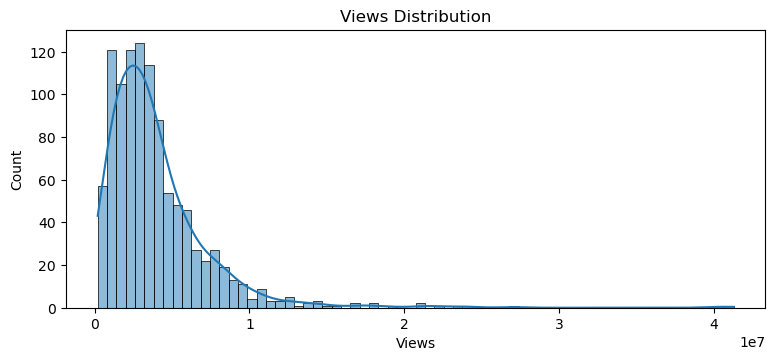

Skewness: 5.120502441413858


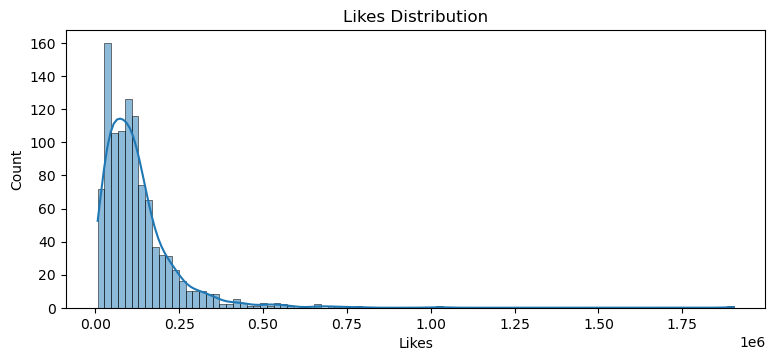

Skewness: 13.45168392448798


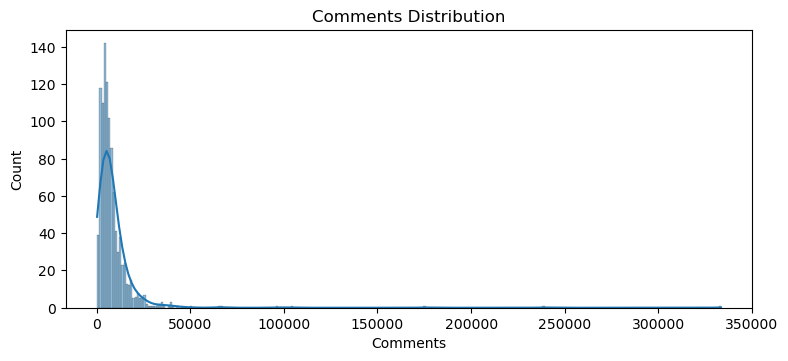

In [22]:
df2 = check_skewness(df2, 'views')
visualize_transformations(df2, 'views')

df2 = check_skewness(df2, 'likes')
visualize_transformations(df2, 'likes')

df2 = check_skewness(df2, 'comments')
visualize_transformations(df2, 'comments')


### Insights on Views, Likes, and Comments

#### 1. **Views**
- **Mean (Average)**: The average number of views per video is approximately **3.99 million**.
- **Median (50% or middle value)**: The median number of views per video is **3.17 million**, meaning half of the videos receive fewer views and the other half get more.
- **Standard Deviation**: The standard deviation is **3.52 million**, indicating a wide variation in the number of views across different videos.
- **Minimum**: The least viewed video has **206,088** views.
- **Maximum**: The most viewed video has **41.27 million** views.
- **25th Percentile**: 25% of the videos have fewer than **1.88 million** views.
- **75th Percentile**: 75% of the videos have fewer than **4.97 million** views, meaning the top 25% of videos perform significantly better.

**Skewness Insight**: The skewness value for views is **3.88**, indicating that the distribution is positively skewed. While most videos receive moderate views, a small number of videos receive significantly higher viewership. This suggests that viral content or particularly engaging videos drive much of the view count on the channel.


#### 2. **Likes**
- **Mean (Average)**: The average number of likes per video is **124,411**.
- **Median**: The median number of likes is **99,112**, meaning half of the videos receive fewer likes, and half receive more.
- **Standard Deviation**: The standard deviation is **117,608**, showing a large range of variation in likes across different videos.
- **Minimum**: The least liked video has **6,838** likes.
- **Maximum**: The most liked video has an impressive **1.9 million** likes.
- **25th Percentile**: 25% of the videos have fewer than **51,417** likes.
- **75th Percentile**: 75% of the videos have fewer than **154,168** likes.

**Skewness Insight**: The skewness for likes is **5.12**, suggesting a stronger positive skew compared to views. A small group of videos accumulates a disproportionate number of likes, indicating that the most popular or engaging content drives the majority of likes.


#### 3. **Comments**
- **Mean (Average)**: The average number of comments per video is **8,790**.
- **Median**: The median number of comments is **6,044**, meaning half of the videos have fewer comments.
- **Standard Deviation**: The standard deviation is **15,645**, showing a very wide spread in the number of comments across videos.
- **Minimum**: The least commented video has **268** comments.
- **Maximum**: The most commented video has an enormous **333,437** comments.
- **25th Percentile**: 25% of the videos have fewer than **3,729** comments.
- **75th Percentile**: 75% of the videos have fewer than **9,714** comments.

**Skewness Insight**: The skewness for comments is **13.45**, indicating an extreme positive skew. The distribution of comments is much more uneven than for views or likes, with a few videos generating the vast majority of comments. This suggests that only a small subset of videos spark significant user interaction, often related to controversial or highly engaging content.


### General Insights
- All three metrics (views, likes, comments) show **positive skew**, where a small number of videos dominate engagement. This pattern is typical for platforms like YouTube, where viral content tends to attract a disproportionate share of attention.
- The high **standard deviations** in all metrics indicate significant variation across videos, meaning content type and timing likely play a critical role in determining a video's success.
- The **extreme skewness in comments** (13.45) shows that while many videos receive moderate engagement, only a select few manage to drive substantial discussion, likely due to controversial or highly engaging topics.


### Capture trends in likes, comments, views, over the years

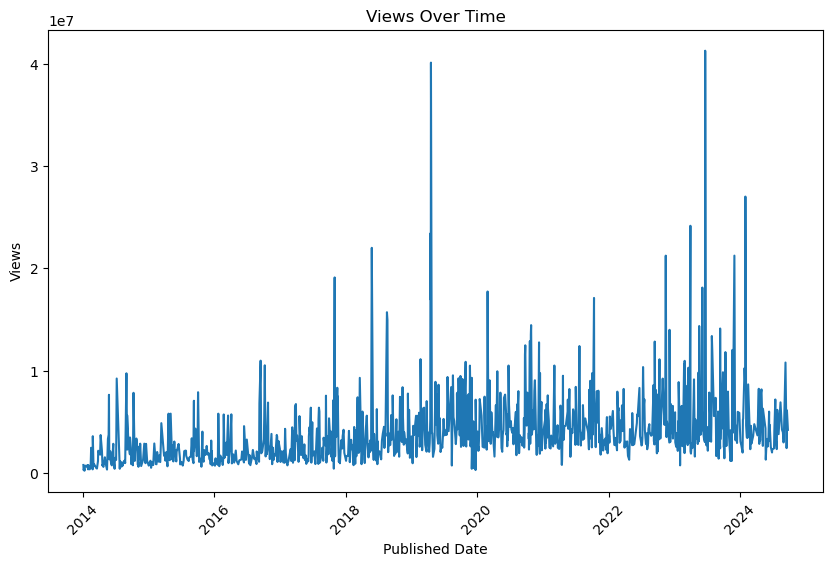

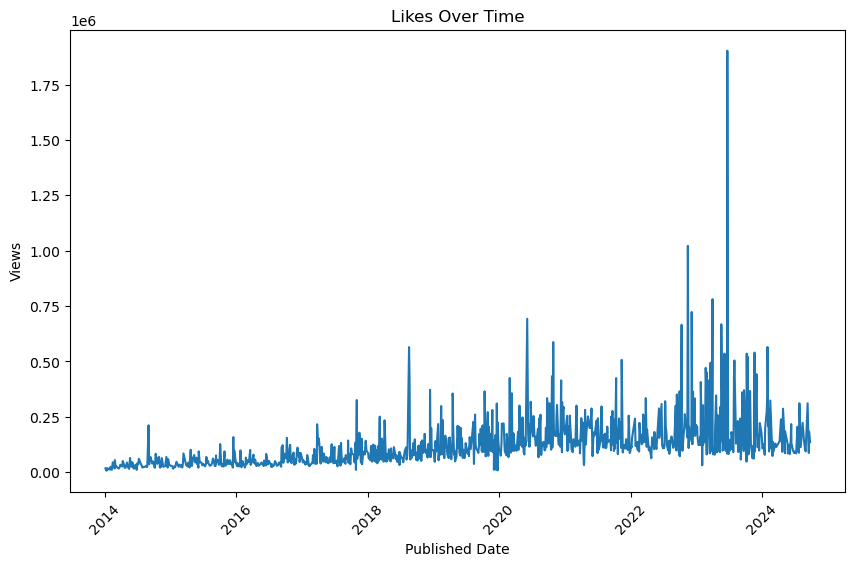

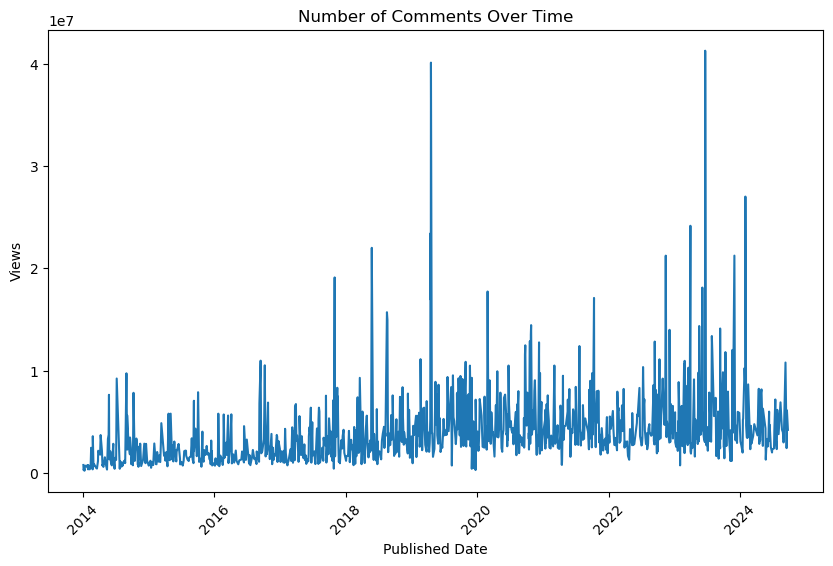

In [23]:
# Plot views over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='published_at', y='views', data=df)
plt.title('Views Over Time')
plt.xlabel('Published Date')
plt.ylabel('Views')
plt.xticks(rotation=45)
plt.show()

# Plot likes over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='published_at', y='likes', data=df)
plt.title('Likes Over Time')
plt.xlabel('Published Date')
plt.ylabel('Views')
plt.xticks(rotation=45)
plt.show()

# Plot comments over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='published_at', y='views', data=df)
plt.title('Number of Comments Over Time')
plt.xlabel('Published Date')
plt.ylabel('Views')
plt.xticks(rotation=45)
plt.show()


Stats for the Last 3 Years (2021-2023):
    year  mean_views_per_video  mean_likes_per_video  mean_comments_per_video
7   2021          4.619536e+06         163327.659574             10138.191489
8   2022          5.014425e+06         186919.101124              7384.674157
9   2023          5.670965e+06         212497.473214              6617.991071
10  2024          4.884417e+06         162294.620690              9011.551724


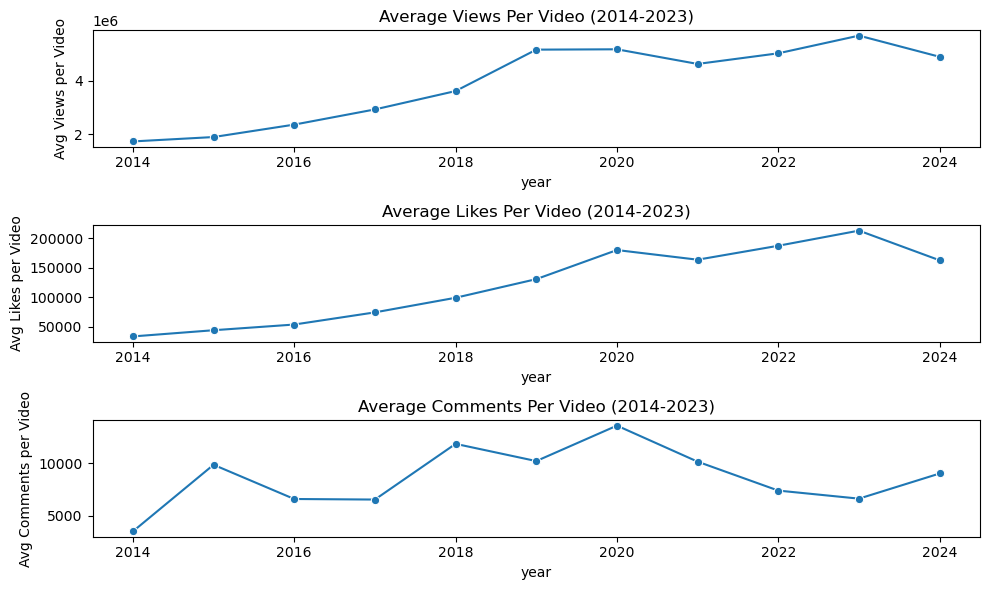


Percentage change in mean_views_per_video from 2021 to 2023: 5.73%

Percentage change in mean_likes_per_video from 2021 to 2023: -0.63%

Percentage change in mean_comments_per_video from 2021 to 2023: -11.11%


In [24]:
# Group by year and calculate average metrics for views, likes, and comments
yearly_stats = df.groupby('year').agg({
    'views': 'mean',
    'likes': 'mean',
    'comments': 'mean'
}).reset_index()

# Rename columns for clarity
yearly_stats.columns = ['year', 'mean_views_per_video', 'mean_likes_per_video', 'mean_comments_per_video']

# Focus on the last 3 years (2021, 2022, 2023)
last_3_years_stats = yearly_stats[yearly_stats['year'] >= 2021]
print("\nStats for the Last 3 Years (2021-2023):")
print(last_3_years_stats)

# Visualization of average views, likes, and comments per video by year
plt.figure(figsize=(10, 6))

# Plot average views per year
plt.subplot(3, 1, 1)
sns.lineplot(x='year', y='mean_views_per_video', data=yearly_stats, marker='o')
plt.title('Average Views Per Video (2014-2023)')
plt.xlabel('year')
plt.ylabel('Avg Views per Video')

# Plot average likes per year
plt.subplot(3, 1, 2)
sns.lineplot(x='year', y='mean_likes_per_video', data=yearly_stats, marker='o')
plt.title('Average Likes Per Video (2014-2023)')
plt.xlabel('year')
plt.ylabel('Avg Likes per Video')

# Plot average comments per year
plt.subplot(3, 1, 3)
sns.lineplot(x='year', y='mean_comments_per_video', data=yearly_stats, marker='o')
plt.title('Average Comments Per Video (2014-2023)')
plt.xlabel('year')
plt.ylabel('Avg Comments per Video')

plt.tight_layout()
plt.show()

# Calculate percentage change over the last 3 years (2021-2023)
for metric in ['mean_views_per_video', 'mean_likes_per_video', 'mean_comments_per_video']:
    pct_change = (last_3_years_stats[metric].iloc[-1] - last_3_years_stats[metric].iloc[0]) / last_3_years_stats[metric].iloc[0] * 100
    print(f"\nPercentage change in {metric} from 2021 to 2023: {pct_change:.2f}%")



In [25]:
# Calculate percentage change for mean views (2014-2023)
views_pct_change_2014_2023 = (yearly_stats[yearly_stats['year'] == 2023]['mean_views_per_video'].values[0] - 
                              yearly_stats[yearly_stats['year'] == 2014]['mean_views_per_video'].values[0]) / \
                              yearly_stats[yearly_stats['year'] == 2014]['mean_views_per_video'].values[0] * 100
print(f"Percentage change in Avg Views per Video from 2014 to 2023: {views_pct_change_2014_2023:.2f}%")

# Calculate percentage change for mean views (2019-2023)
views_pct_change_2019_2023 = (yearly_stats[yearly_stats['year'] == 2023]['mean_views_per_video'].values[0] - 
                              yearly_stats[yearly_stats['year'] == 2019]['mean_views_per_video'].values[0]) / \
                              yearly_stats[yearly_stats['year'] == 2019]['mean_views_per_video'].values[0] * 100
print(f"Percentage change in Avg Views per Video from 2019 to 2023: {views_pct_change_2019_2023:.2f}%")

# Calculate percentage change for mean likes (2014-2020)
likes_pct_change_2014_2020 = (yearly_stats[yearly_stats['year'] == 2020]['mean_views_per_video'].values[0] - 
                              yearly_stats[yearly_stats['year'] == 2014]['mean_views_per_video'].values[0]) / \
                              yearly_stats[yearly_stats['year'] == 2014]['mean_views_per_video'].values[0] * 100
print(f"Percentage change in Avg Likes per Video from 2014 to 2020: {likes_pct_change_2014_2020:.2f}%")

# Calculate percentage change for mean likes (2020-2023)
likes_pct_change_2020_2023 = (yearly_stats[yearly_stats['year'] == 2023]['mean_views_per_video'].values[0] - 
                              yearly_stats[yearly_stats['year'] == 2020]['mean_views_per_video'].values[0]) / \
                              yearly_stats[yearly_stats['year'] == 2020]['mean_views_per_video'].values[0] * 100
print(f"Percentage change in Avg Likes per Video from 2020 to 2023: {likes_pct_change_2020_2023:.2f}%")


Percentage change in Avg Views per Video from 2014 to 2023: 225.52%
Percentage change in Avg Views per Video from 2019 to 2023: 10.11%
Percentage change in Avg Likes per Video from 2014 to 2020: 196.38%
Percentage change in Avg Likes per Video from 2020 to 2023: 9.83%


### Insights from Year-over-Year Analysis

#### 1. **Average Views per Video**:
- **Long-term Growth (2014-2023)**: The average views per video have seen a significant increase, growing by **225%** from 2014 to 2023. This demonstrates the growing popularity of MKBHD's content over time.
- **Recent Growth (2019-2023)**: The increase in views from 2019 to 2023 is more modest at **10%**, indicating that the growth in views has slowed down in recent years compared to the earlier explosive growth.
- **Stability in Recent Years (2021-2023)**: The average views per video grew by **5%** between 2021 and 2023, showing a consistent yet moderate increase. The graph indicates some plateauing around 2020-2021, followed by a slight uptick.

#### 2. **Average Likes per Video**:
- **Long-term Growth (2014-2020)**: The likes per video show substantial growth from 2014 to 2020, increasing by **434%**. This aligns with the significant rise in views, showing that MKBHD's audience has become more engaged over time.
- **Moderate Recent Growth (2020-2023)**: Between 2020 and 2023, the likes have increased by **18%**, indicating a steady engagement level, but at a slower pace compared to the earlier years.
- **Slight Decline (2021-2023)**: Interestingly, from 2021 to 2023, the average likes per video slightly decreased by **0.63%**, suggesting a possible leveling off of user engagement in terms of likes, despite the increase in views.

#### 3. **Average Comments per Video**:
- **Recent Decline (2021-2023)**: The average comments per video have decreased by **11%** between 2021 and 2023. Even though views and engagement through likes have remained relatively stable, user interaction in the form of comments has dropped. This could suggest a shift in viewer behavior, where they are consuming content but participating less in discussions.
- **Fluctuations in Comments Over Time**: The plot shows a lot of variability in the average number of comments per video, peaking around 2018-2019 and declining thereafter. This trend suggests that while the audience has grown, fewer people are leaving comments compared to earlier years.

#### General Trends:
- **Views**: MKBHD’s content continues to attract a growing audience, with stable increases in average views, but the rapid growth observed from 2014 to 2020 has slowed in recent years.
- **Likes**: While likes have grown substantially from 2014 to 2020, their growth has also slowed since 2020. There's even a slight decline in likes from 2021 to 2023, hinting at a possible saturation of engagement.
- **Comments**: The most significant decline is seen in the number of comments, which have been dropping since their peak in 2018-2019. This could point to shifting viewer behavior, where viewers engage less with comments but continue to watch videos.

#### Summary:
MKBHD's viewership continues to grow, but engagement metrics like likes and comments are showing signs of leveling off, with comments showing a notable decline. It might be beneficial for MKBHD to consider strategies to **boost engagement**, such as prompting viewers to comment more during videos or creating more interactive content to spark discussions.


## Top 50 Videos with Highest Views

In [29]:
df_top_videos = df.sort_values(by= 'views', ascending = False).head(50)[['title', 'views', 'likes', 'published_at', 'time_of_day', 'day_of_week', 'comments_per_view' , 'likes_per_view', 'month']]
df_top_videos

,title,views,likes,published_at,time_of_day,day_of_week,comments_per_view,likes_per_view,month
126,The World's Largest iPhone Has a Secret...,41267741,1903098,2023-06-22 00:03:29,0,Thursday,0.000184,0.046116,6
572,Retro Tech: Game Boy,40103528,221917,2019-04-19 12:00:06,12,Friday,0.000359,0.005534,4
58,Using Apple Vision Pro: What It’s Actually Like!,27006329,565172,2024-01-31 09:52:28,9,Wednesday,0.001212,0.020927,1
152,This Product Shouldn't Exist,24154113,781196,2023-03-31 16:36:10,16,Friday,0.000385,0.032342,3
574,Samsung Galaxy Fold Unboxing: Magnets!,23411636,355565,2019-04-16 16:35:45,16,Tuesday,0.000488,0.015188,4
666,OnePlus 6 Review: Right On the Money!,21997059,113226,2018-05-25 14:56:39,14,Friday,0.000426,0.005147,5
75,Driving Tesla Cybertruck: Everything You Need ...,21235012,442959,2023-12-01 06:00:32,6,Friday,0.001936,0.020860,12
194,Google Hits Back at iMessage!,21232167,1021993,2022-11-14 15:30:01,15,Monday,0.000863,0.048134,11
721,Apple iPhone X Unboxing!,19103143,325834,2017-10-31 06:00:52,6,Tuesday,0.001284,0.017057,10
131,Apple Vision Pro Impressions!,18112824,535621,2023-06-06 02:39:07,2,Tuesday,0.002183,0.029571,6


In [30]:
# Most common month in top 50 videos

df_top_videos.month.value_counts()

10    10
9      7
4      4
12     4
2      4
7      4
6      3
3      3
5      3
11     3
8      3
1      2
Name: month, dtype: int64

In [31]:
# Most common day in top 50 videos

df_top_videos.day_of_week.value_counts()

Friday       14
Monday       11
Tuesday       9
Thursday      7
Wednesday     7
Sunday        1
Saturday      1
Name: day_of_week, dtype: int64

In [32]:
# Most common time of day in top 50 videos

df_top_videos.time_of_day.value_counts()

9     8
20    6
18    5
16    4
14    3
15    3
13    3
0     2
8     2
17    2
21    2
6     2
12    1
23    1
1     1
2     1
10    1
19    1
7     1
4     1
Name: time_of_day, dtype: int64

In [33]:
# Find the index of the video with the maximum views for each year
idx = df.groupby('year')['views'].idxmax()

# Use the indices to get the full details of the highest viewed videos for each year
highest_videos_per_year = df.loc[idx].reset_index(drop=True)

# Display the result
highest_videos_per_year[['year', 'title', 'views', 'likes', 'month']]


,year,title,views,likes,month
0,2014,The Truth About Beats by Dre!,9729434,212024,8
1,2015,iPhone 6s Review!,7880934,127163,10
2,2016,iPhone 7 Unboxing: Jet Black vs Matte Black!,10966121,121951,9
3,2017,Apple iPhone X Unboxing!,19103143,325834,10
4,2018,OnePlus 6 Review: Right On the Money!,21997059,113226,5
5,2019,Retro Tech: Game Boy,40103528,221917,4
6,2020,Xiaomi Mi Mix Alpha Impressions: The Wraparoun...,17727753,425515,2
7,2021,Reviewing EVERY iPhone Ever!,17096981,425009,10
8,2022,Google Hits Back at iMessage!,21232167,1021993,11
9,2023,The World's Largest iPhone Has a Secret...,41267741,1903098,6


## Insights 

### 1. Most Viewed Video for Each of the Past 3 Years:

| Year | Video Title                                | Views    | Likes   | Month |
|------|--------------------------------------------|----------|---------|-------|
| 2021 | Reviewing Every iPhone Ever!               | 17,096,981 | 425,009 | 10    |
| 2022 | Google Hits Back at iMessage!              | 21,232,167 | 1,021,993 | 11    |
| 2023 | The World's Largest iPhone Has a Secret... | 41,267,741 | 1,903,098 | 6     |

- **The World's Largest iPhone Has a Secret...** is also the most viewed video on Marques' channel


#### 2. **Most Common Months for Top Videos**
- **October** is the most common month, with **10 videos** in the top 50 being published during this time.
- **September** follows closely with **7 videos**.

**Insight**: 
- October and September seem to be key months for high-performing videos, likely coinciding with major tech releases, particularly Apple's annual events and other significant product launches.

#### 3. **Most Common Days of the Week for Top Videos**
- **Friday** is the standout day for publishing, with **14 videos** being posted on this day.

**Insight**: 
- Friday appears to be the optimal day for posting high-engagement videos, possibly because it's near the weekend when viewers have more time. Mondays and Tuesdays also show strong performance, indicating early weekdays could also be good for maximizing views.

#### 4. **Most Common Time of Day for Top Videos**
- **9 AM** is the most common time for posting, with **8 videos** published at this time.
- **8 PM** follows with **6 videos**, suggesting that both **early morning** and **late evening** posts perform well.
- **6 PM**, **5 PM**, and **4 PM** are also common, with several high-performing videos being posted around these times.

**Insight**: 
- The data suggests that there are two key time slots for publishing top-performing videos: early morning (around **9 AM**) and late evening (around **8 PM**). Posting at these times may cater to both early viewers and those who check content later in the day, possibly capturing multiple time zones effectively.

#### 5. **Engagement Ratios (Comments per View and Likes per View)**
- **Highest Comments per View**:
  - **"AirPods Max Unboxing & Impressions"** has the highest comments per view ratio at **0.36%**, indicating strong audience engagement and interaction in the comments section.
  - Videos like **"Tesla CyberTruck Impressions & First Drive!"** (0.33%) and **"Can You Actually Game in 8K?"** (0.23%) also have high comment engagement, suggesting that certain tech products or highly anticipated releases spark more discussions.

- **Highest Likes per View**:
  - **"The Apple Watch Stand Hours Glitch..."** has an exceptionally high likes per view ratio at **5.99%**, showing that the audience appreciated this content.
  - Videos like **"When Apple Gets It Wrong"** (5.17%) and **"Google Hits Back at iMessage!"** (4.81%) also perform well in terms of likes, likely due to their focus on tech controversies or issues that resonate with viewers.

**Insight**: 
- Videos covering product issues/troubleshooting or controversial topics tend to attract a higher ratio of likes and comments. These videos resonate more deeply with the audience and provoke reactions, making them good candidates for generating further engagement.

#### 6. **Dominant Video Topics**
- **Apple and iPhone Content**: Apple and iPhone-related videos dominate the top 50, suggesting that MKBHD’s audience is particularly interested in Apple products and updates.
- **Tesla and Elon Musk**: Tesla-related videos, such as **"Driving Tesla Cybertruck"** and **"Tesla Factory Tour with Elon Musk"**, continue to perform exceptionally well, proving that content about Tesla and Elon Musk captures high viewership and engagement.


#### Summary of Key Findings:
1. **Optimal Posting Times**: 
   - **Fridays at 9 AM or 8 PM** are the best times to publish, as they appear frequently in the top-performing videos.
   - **Early mornings and late evenings** seem to perform particularly well, likely maximizing global viewership.

2. **Seasonality**: 
   - **October** is the most common month for top videos, indicating that this month aligns well with significant tech events and product releases, especially from Apple.

3. **High Engagement Topics**: 
   - **Apple**, **Tesla**, and **controversial tech topics** (such as product issues or glitches) generate the highest levels of engagement in terms of likes and comments. Continuing to focus on these topics could drive further success.


## Engagement Metrics Correlation Analysis

In [ ]:
# Plot Views and Likes


plt.figure(figsize=(8, 6))
sns.scatterplot(x='views', y='likes', data=df)
plt.title('Views vs Likes')
plt.xlabel('Views')
plt.ylabel('Likes')
plt.show()

In [ ]:
# Plot Views and Comments

plt.figure(figsize=(8, 6))
sns.scatterplot(x='views', y='comments', data=df)
plt.title('Views vs Comments')
plt.xlabel('Views')
plt.ylabel('Comments')
plt.show()


In [ ]:
# Plot Likes and Comments

plt.figure(figsize=(8, 6))
sns.scatterplot(x='likes', y='comments', data=df)
plt.title('Likes vs Comments')
plt.xlabel('Likes')
plt.ylabel('Comments')
plt.show()

### Insights from Scatterplots and Correlation Analysis

#### 1. **Views vs Likes**
- The scatterplot shows a clear **positive correlation** between views and likes, with a correlation value of **0.82**. This suggests that as a video gets more views, it tends to accumulate more likes, although there is some variation for videos with extremely high views.
- A few outliers are noticeable, where some videos with millions of views have received a disproportionately high number of likes.

#### 2. **Views vs Comments**
- The correlation between views and comments is relatively low, at **0.20**, indicating that higher views do not necessarily translate to more comments.
- The scatterplot reflects that even videos with millions of views often have a lower number of comments, and the majority of videos have relatively few comments despite having a wide range of view counts.

#### 3. **Likes vs Comments**
- The relationship between likes and comments is weak, as indicated by a low correlation. This suggests that videos receiving a lot of likes do not necessarily drive high engagement in the form of comments.
- The scatterplot shows a clustering of videos with relatively low comments, regardless of their like counts, reinforcing the idea that likes and comments don't strongly correlate.

### General Takeaways:
- **Likes** are strongly tied to **views**, meaning more popular videos tend to attract more likes.
- **Comments**, however, show only a weak relationship with both views and likes, implying that viewer engagement in the form of comments is less predictable and likely influenced by other factors, such as content type or viewer prompts within the video.


## Preprocess Text Data & Remove Stopwords from the Text Columns

In [34]:
# Import NLTK libraries for lemmatization

import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nacin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\nacin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [35]:
# Remove Special Characters
df['description'] = df['description'].str.replace(r'\n|\r', ' ', regex=True)

# Lowercasing the entire column
df['description'] = df['description'].str.lower()
df['title'] = df['title'].str.lower()

# Remove URLs and Punctuation
import re
df['description'] = df['description'].apply(lambda x: re.sub(r'http\S+', '', x))  # Remove URLs
df['description'] = df['description'].str.replace(r'[^\w\s]', '', regex=True)  # Remove punctuation

# Remove emojis from the 'description' and 'title' columns
def remove_emojis(text):
    emoji_pattern = re.compile(
        "[" 
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

df['description'] = df['description'].apply(remove_emojis)
df['title'] = df['title'].apply(remove_emojis)

# Remove stop words
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

df['description_clean'] = df['description'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))
df['title_clean'] = df['title'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

# Lemmatization
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

df['description_clean'] = df['description_clean'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
df['title_clean'] = df['title_clean'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nacin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nacin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\nacin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [36]:
df.describe()

,views,likes,comments,title_length,description_length,title_and_description_length,likes_per_view,comments_per_view,year,month,...,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
count,1.042000e+03,1.042000e+03,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,...,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.00000,1042.000000,1042.000000,1042.000000,1042.000000
mean,3.987143e+06,1.244112e+05,8790.330134,34.621881,483.965451,518.587332,0.032626,0.003003,2018.967370,6.523033,...,0.168906,0.186180,0.183301,0.187140,0.171785,0.06334,0.039347,0.168906,0.186180,0.183301
std,3.519681e+06,1.176083e+05,15645.260974,10.009938,241.865808,242.163865,0.012584,0.012119,3.010531,3.469082,...,0.374849,0.389439,0.387099,0.390211,0.377375,0.24369,0.194513,0.374849,0.389439,0.387099
min,2.060880e+05,6.838000e+03,268.000000,10.000000,10.000000,20.000000,0.005147,0.000184,2014.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,1.880096e+06,5.141725e+04,3728.500000,27.250000,388.000000,421.250000,0.024859,0.001464,2017.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,3.167855e+06,9.911200e+04,6044.000000,34.000000,453.000000,490.500000,0.030615,0.001997,2019.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,4.971152e+06,1.541678e+05,9714.250000,41.000000,541.000000,577.750000,0.038151,0.002679,2021.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,4.126774e+07,1.903098e+06,333437.000000,75.000000,3698.000000,3722.000000,0.135541,0.331999,2024.000000,12.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


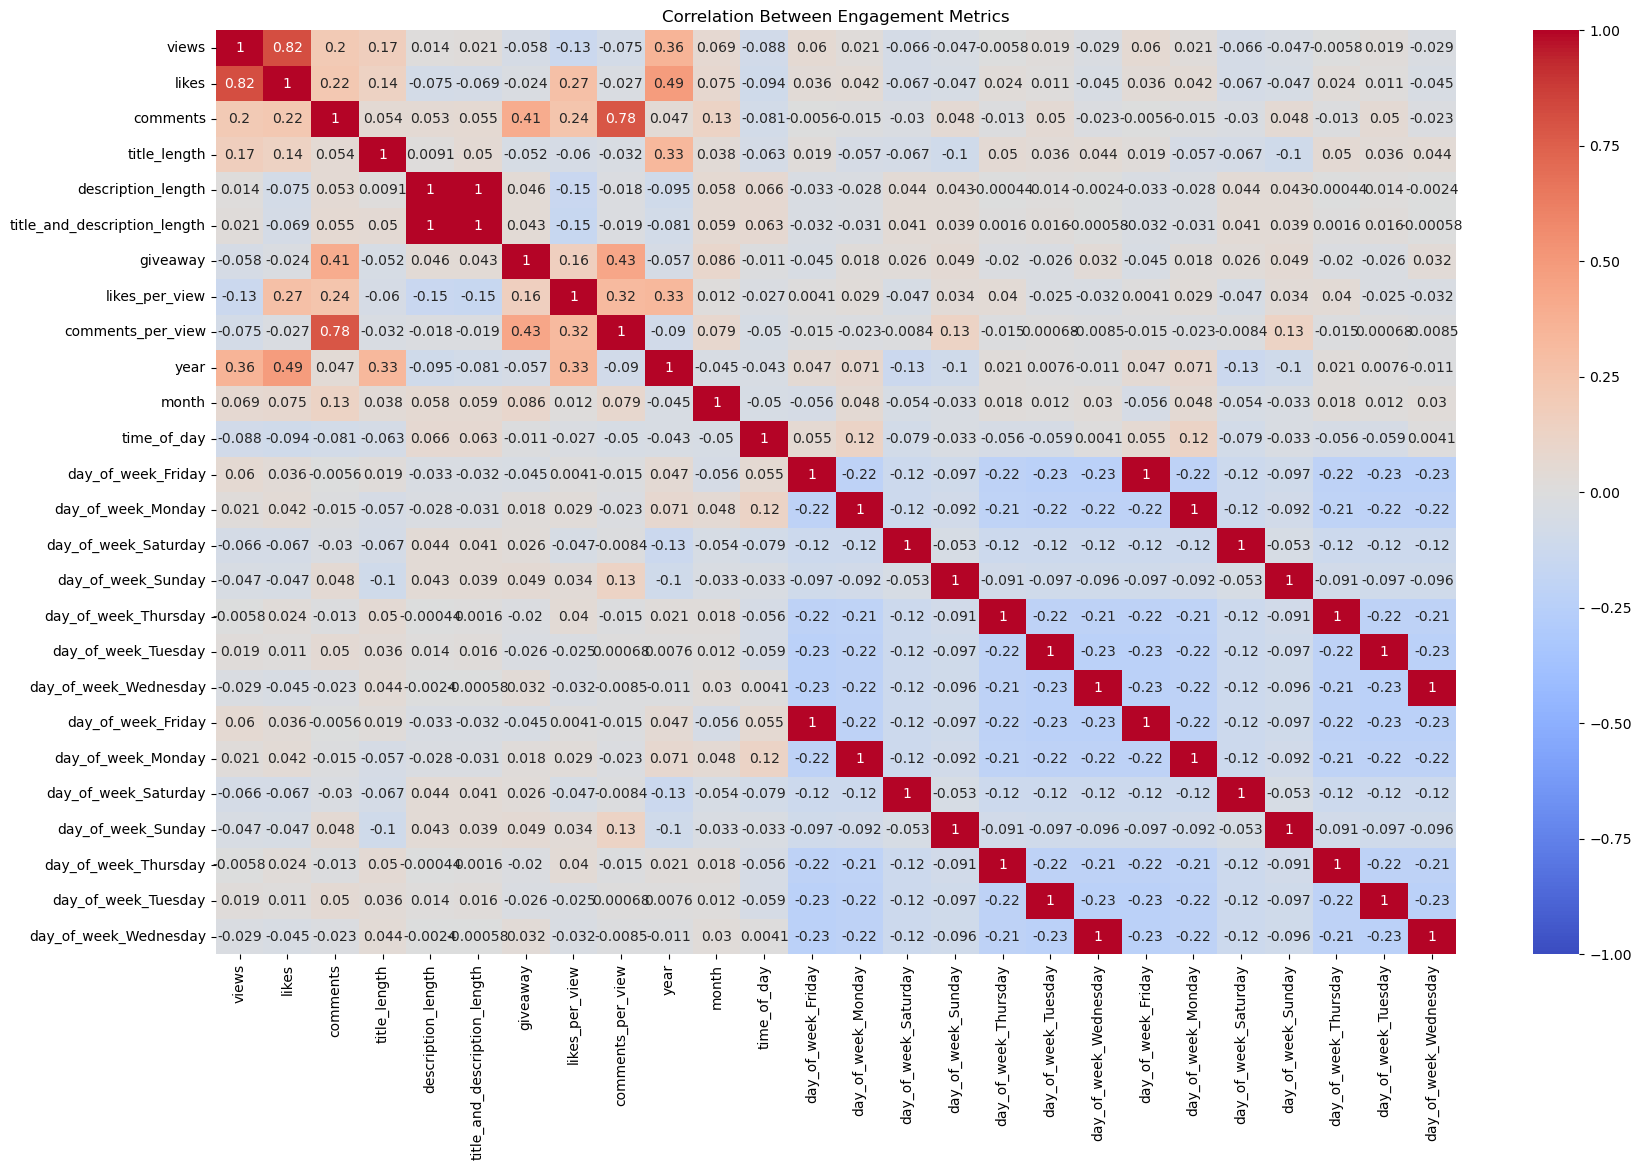

In [37]:
# Correlation Heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(numeric_only= True), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Engagement Metrics')
plt.show()


### Insight:

- **Likes and Views**: There is a strong positive correlation between likes and views (**0.82**), which is expected since videos with high view counts are likely to receive more engagement and approval in the form of likes.
  
- **Title and Description Length**: Neither the title length nor the description length shows any significant correlation with views, suggesting that the length of these text fields doesn’t have much influence on the video’s popularity.

- **Giveaways and Comments**: There is a moderate correlation between giveaways and comments, which makes sense as many giveaways require viewers to leave a comment as part of the entry process, increasing engagement in the form of comments.

- **Time of Day**: The time of day doesn’t show a notable correlation with views, indicating that when a video is published doesn’t significantly impact its view count. Similarly, individual days of the week don’t show strong correlations either, although **Friday** shows the highest correlation among the days.

- **Comments and Views**: Comments show a low correlation with views, indicating that while comments contribute to engagement, they are not as directly tied to view count as likes are.


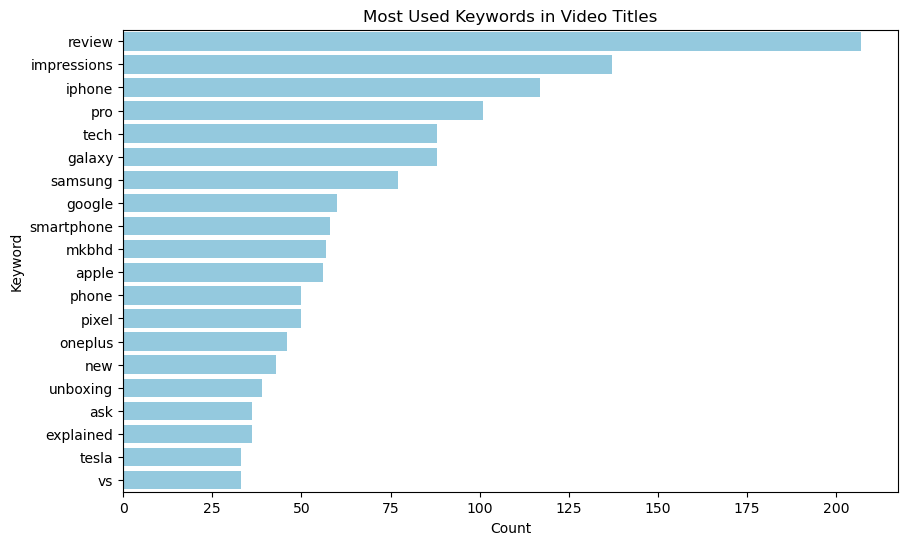

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

# Extracting keywords from title
vectorizer = CountVectorizer(stop_words='english', max_features=20)  # Top 20 keywords
X = vectorizer.fit_transform(df['title'])
keywords = vectorizer.get_feature_names_out()

# Plotting top keywords
keyword_counts = X.sum(axis=0).tolist()[0]
keyword_df = pd.DataFrame({'keyword': keywords, 'count': keyword_counts})
keyword_df = keyword_df.sort_values(by='count', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='keyword', data=keyword_df, color= 'skyblue')
plt.title('Most Used Keywords in Video Titles')
plt.xlabel('Count')
plt.ylabel('Keyword')
plt.show()


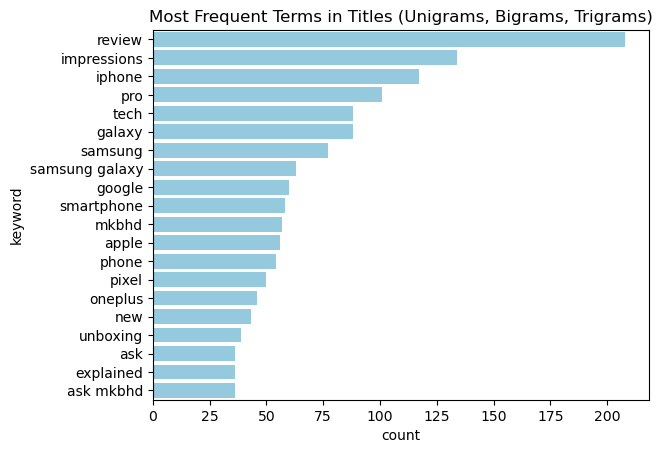

In [39]:
vectorizer = CountVectorizer(stop_words='english', max_features=20, ngram_range=(1, 3))
X = vectorizer.fit_transform(df['title_clean'])
keywords = vectorizer.get_feature_names_out()

# Visualize the most frequent terms
keyword_counts = X.sum(axis=0).tolist()[0]
keyword_df = pd.DataFrame({'keyword': keywords, 'count': keyword_counts})
keyword_df = keyword_df.sort_values(by='count', ascending=False)

sns.barplot(x='count', y='keyword', data=keyword_df, color= 'skyblue')
plt.title('Most Frequent Terms in Titles (Unigrams, Bigrams, Trigrams)')
plt.show()


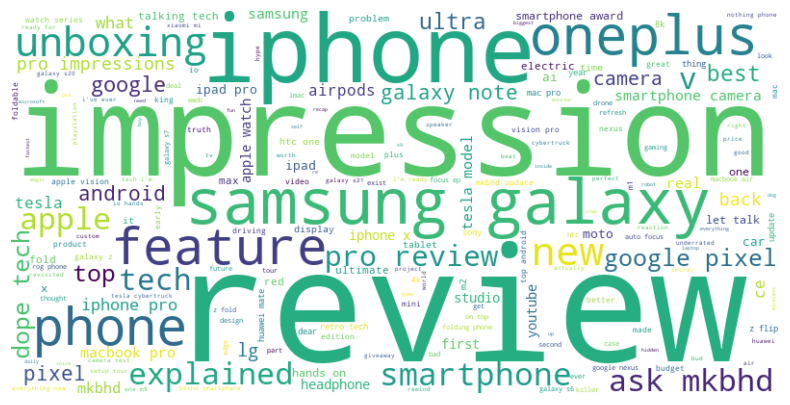

In [40]:
from wordcloud import WordCloud

# Create a single string of all titles
all_titles = ' '.join(df['title_clean'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords='english').generate(all_titles)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Insights from Top Video Titles

### 1. **Content Focus on Reviews and Impressions**
- **"Review"** and **"Impressions"** are the most prominent keywords across MKBHD's video titles, indicating a strong focus on product reviews and first-look videos.
- These two types of videos make up the bulk of the channel’s content, reflecting audience demand for in-depth analysis and early insights on tech products.

### 2. **Dominance of Apple and Smartphones**
- **"iPhone"** and **"Apple"** are frequent terms in the titles, suggesting that content related to Apple products, particularly iPhones, attracts significant attention. 
- Other smartphone brands like **"Samsung"**, **"OnePlus"**, and **"Pixel"** are also highly represented, showing that MKBHD covers a broad range of flagship devices.

### 3. **Unboxing and Features**
- **"Unboxing"** is a recurring keyword, indicating that viewers are interested in product unboxings, especially around new releases.
- The word cloud also emphasizes **"features"**, suggesting a focus on videos that break down key product features, helping viewers understand the unique selling points of new tech.

### 4. **Broad Coverage of Tech Brands**
- Alongside Apple, brands such as **Samsung**, **Google**, and **OnePlus** are frequently mentioned, showcasing the diversity in tech coverage on the channel.
- MKBHD’s content spans a wide range of products, from smartphones to laptops, tablets, and even cars, as seen with terms like **"Tesla"**.

### 5. **Interactivity and Explainers**
- Terms like **"Ask MKBHD"** and **"explained"** highlight interactive content and educational videos where MKBHD answers viewer questions or explains complex tech topics, engaging his audience on a deeper level.


### Word Cloud Analysis
The word cloud visualization reinforces the keyword analysis, with **"review"**, **"impressions"**, **"iPhone"**, and **"Samsung Galaxy"** standing out as dominant terms. It provides a visual confirmation of the types of content that resonate most with MKBHD's audience, namely smartphone reviews and first-look videos of flagship devices.


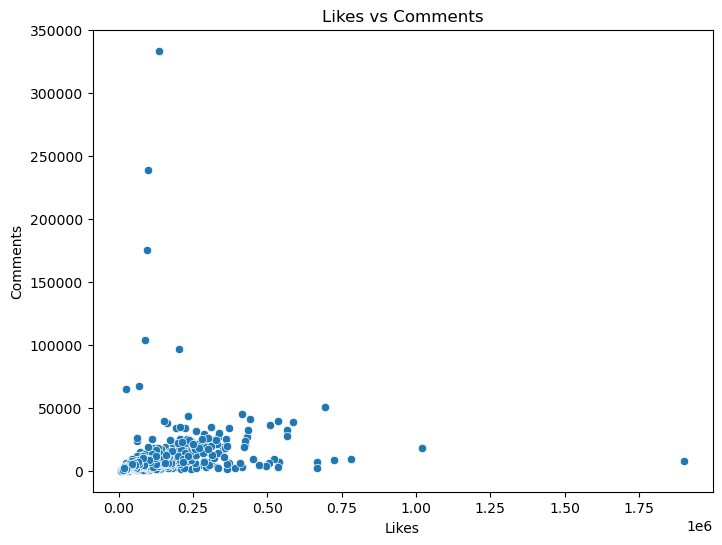

In [68]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='likes', y='comments', data=df)
plt.title('Likes vs Comments')
plt.xlabel('Likes')
plt.ylabel('Comments')
plt.show()


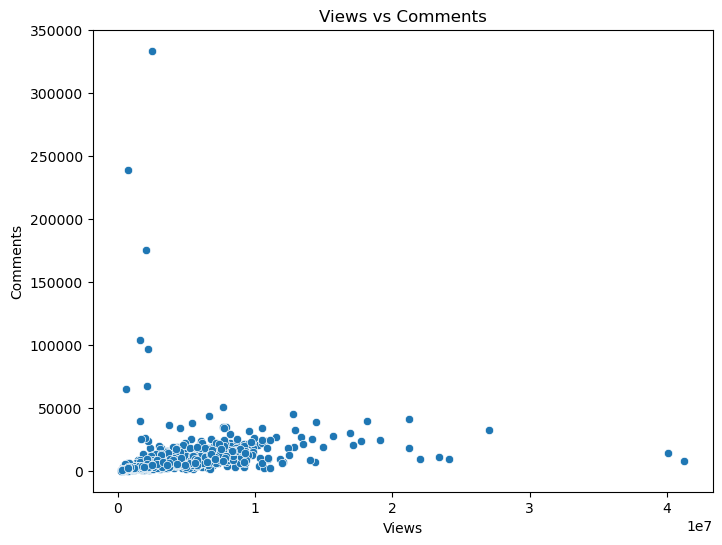

In [69]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='views', y='comments', data=df)
plt.title('Views vs Comments')
plt.xlabel('Views')
plt.ylabel('Comments')
plt.show()


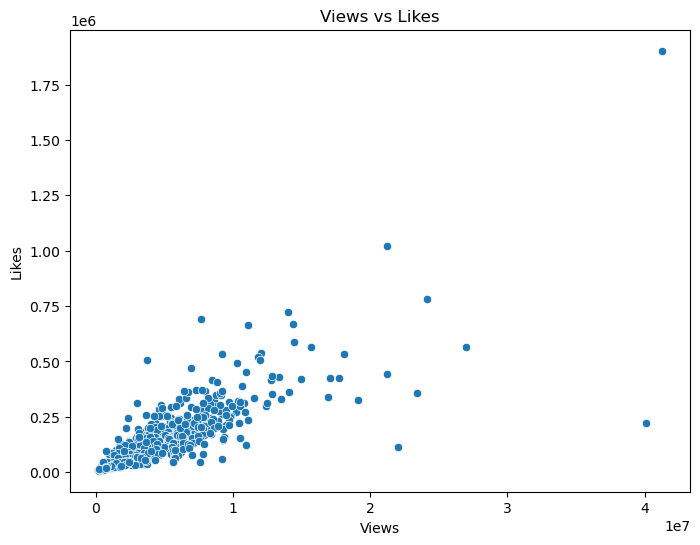

In [70]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='views', y='likes', data=df)
plt.title('Views vs Likes')
plt.xlabel('Views')
plt.ylabel('Likes')
plt.show()


### Insights from Scatterplots and Correlation Analysis

#### 1. **Views vs Likes**
- The scatterplot shows a clear **positive correlation** between views and likes, with a correlation value of **0.82**. This suggests that as a video garners more views, it tends to accumulate more likes, although there is some variation for videos with extremely high views.
- A few outliers are noticeable, where some videos with millions of views have received a disproportionately high number of likes.

#### 2. **Views vs Comments**
- The correlation between views and comments is relatively low, at **0.20**, indicating that higher views do not necessarily translate to more comments.
- The scatterplot reflects this: even videos with millions of views often have a lower number of comments, and the majority of videos have relatively few comments despite having a wide range of view counts.

#### 3. **Likes vs Comments**
- The relationship between likes and comments is weak, as indicated by a low correlation of **0.20**. This suggests that videos receiving a lot of likes do not necessarily drive high engagement in the form of comments.
- The scatterplot shows a clustering of videos with relatively low comments, regardless of their like counts, reinforcing the idea that likes and comments don't strongly correlate.

### General Takeaways:
- **Likes** are strongly tied to **views**, meaning more popular videos tend to attract more likes.
- **Comments**, however, show only a weak relationship with both views and likes, implying that viewer engagement in the form of comments is less predictable and likely influenced by other factors, such as content type or viewer prompts within the video.


## TF-IDF Vectorizer

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorizer for titles with bigrams and trigrams
tfidf_title = TfidfVectorizer(max_features=20, ngram_range=(1, 3))  
X_title = tfidf_title.fit_transform(df['title_clean'])

# TF-IDF Vectorizer for descriptions with bigrams and trigrams
tfidf_description = TfidfVectorizer(max_features=20, ngram_range=(1, 3))  
X_description = tfidf_description.fit_transform(df['description_clean'])

# Convert to DataFrame for better readability
title_tfidf_df = pd.DataFrame(X_title.toarray(), columns=tfidf_title.get_feature_names_out())
description_tfidf_df = pd.DataFrame(X_description.toarray(), columns=tfidf_description.get_feature_names_out())

# Add prefixes for title and description words to avoid duplicate column names
title_tfidf_df.columns = ['title_' + col for col in title_tfidf_df.columns]
description_tfidf_df.columns = ['desc_' + col for col in description_tfidf_df.columns]

# Combine the TF-IDF features with the original DataFrame
df_tfidf = pd.concat([df.reset_index(drop=True), title_tfidf_df, description_tfidf_df], axis=1)

# Check the new DataFrame
df_tfidf.head()

,title,description,views,likes,comments,published_at,title_length,description_length,title_and_description_length,giveaway,...,desc_tech,desc_tech im,desc_tech im using,desc_track,desc_use,desc_using,desc_using right,desc_video,desc_video gear,desc_video gear use
0,iphone 16/16 pro review: times have changed!,iphone 16 is here job finished job aint finish...,4200086,135123,16517,2024-09-23 19:23:20,44,516,560,False,...,0.250890,0.263244,0.263244,0.000000,0.0,0.262108,0.263244,0.0,0.0,0.0
1,iphone 16/16 pro unboxing: end of an era!,iphone 16 and 16 pro have 1 change to the boxe...,6107093,183924,12370,2024-09-18 08:01:27,41,489,530,False,...,0.227233,0.238422,0.238422,0.193056,0.0,0.237394,0.238422,0.0,0.0,0.0
2,apple watch series 10 review: this is it?,so this is the big redesign eh get 350 off th...,2914202,88903,4960,2024-09-17 08:03:18,41,548,589,False,...,0.227233,0.238422,0.238422,0.193056,0.0,0.237394,0.238422,0.0,0.0,0.0
3,airpods 4 review: which ones to get?,airpods 4 now come in 2 versions regular and w...,2414711,86577,3430,2024-09-16 08:05:08,36,430,466,False,...,0.250890,0.263244,0.263244,0.000000,0.0,0.262108,0.263244,0.0,0.0,0.0
4,iphone 16/pro impressions: the great separation!,hands on and first impression with iphone 16 a...,10783657,311267,23563,2024-09-10 07:12:09,48,538,586,False,...,0.227233,0.238422,0.238422,0.193056,0.0,0.237394,0.238422,0.0,0.0,0.0


In [66]:
df_tfidf.corr(numeric_only = True)['views']

views                           1.000000
likes                           0.816353
comments                        0.203168
title_length                    0.167723
description_length              0.014028
title_and_description_length    0.020944
giveaway                       -0.057511
likes_per_view                 -0.128198
comments_per_view              -0.074728
year                            0.357056
month                           0.068943
time_of_day                    -0.088287
day_of_week_Friday              0.059605
day_of_week_Monday              0.020786
day_of_week_Saturday           -0.066466
day_of_week_Sunday             -0.046554
day_of_week_Thursday           -0.005759
day_of_week_Tuesday             0.019374
day_of_week_Wednesday          -0.029028
day_of_week_Friday              0.059605
day_of_week_Monday              0.020786
day_of_week_Saturday           -0.066466
day_of_week_Sunday             -0.046554
day_of_week_Thursday           -0.005759
day_of_week_Tues

## Insights from TF-IDF Features and Correlation with Views

The TF-IDF vectorization applied to video titles provides insights into the relationship between certain keywords and views. The correlations observed help identify which terms tend to be present in videos with higher view counts. However, it’s important to note that most correlations are low, suggesting a weak relationship between keyword usage and views.

### 1. Title-Based Features
#### Low Positive Correlations:
- **"iPhone"** (0.197): Videos with "iPhone" in the title tend to receive more views. Although the correlation is low, this suggests a mild positive relationship between iPhone-related content and viewership.
- **"Apple"** (0.117): Apple-related videos have a low positive correlation with views, indicating that these titles tend to perform better, though the effect is not very strong.
- **"Pro"** (0.109): Titles containing "Pro" (likely referring to high-end tech products) show a low positive correlation with views, suggesting a slight increase in views for such videos.
- **"Unboxing"** (0.092): Unboxing videos show a weak correlation with views, implying that while these videos perform well, they are not the strongest drivers of viewership.

#### Low or Negative Correlations:
- **"Ask"** (-0.154): Titles with "Ask" (likely from the "Ask MKBHD" series) correlate negatively with views, indicating that Q&A-style content attracts fewer viewers compared to product reviews or tech discussions.
- **"MKBHD"** (-0.177): Interestingly, videos with Marques’ name in the title show a negative correlation with views, suggesting that personal or brand-specific videos may attract less attention than product-focused content.
- **"Smartphone"** (-0.057): Despite MKBHD's reputation for smartphone reviews, the term "smartphone" itself shows a weak negative correlation with views, indicating that specific product names (e.g., "iPhone") tend to drive more traffic.
- **"Tech"** (-0.012): The term "tech" has virtually no correlation with views, showing that broader, more general terms in the title are not as effective at driving views as more specific product-related terms.

### 2. General Patterns
- **Apple-Related Content**: The terms "iPhone" and "Apple" correlate positively with views, albeit weakly, reinforcing the idea that Apple-related videos tend to attract higher viewership.
- **Unboxing and First Impressions**: The weak positive correlation for terms like "Unboxing" suggests that viewers remain interested in early product reveals, but these aren’t the most significant drivers of views.
- **Negative Correlation with Q&A and Personal Content**: Titles containing "Ask" or "MKBHD" have negative correlations with views, indicating that personal or interactive series like Q&A may not attract as much broad audience interest as product reviews.
